<a href="https://www.arduino.cc/"><img src="https://raw.githubusercontent.com/sandeepmistry/aimldevfest-workshop-2019/master/images/Arduino_logo_R_highquality.png" width=200/></a>

# Tiny ML on Arduino

## Classify objects by color tutorial

https://github.com/arduino/ArduinoTensorFlowLiteTutorials/


## Setup Python Environment

The next cell sets up the dependencies in required for the notebook, run it.


In [27]:
# Setup environment
!apt-get -qq install xxd
!pip install pandas numpy matplotlib
!pip install tensorflow

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


# Upload Data

1. Open the panel on the left side of Colab by clicking on the **>**
1. Select the Files tab
1. Drag `csv` files from your computer to the tab to upload them into colab.


# Train Neural Network


## Parse and prepare the data

The next cell parses the csv files and transforms them to a format that will be used to train the full connected neural network.


TensorFlow version = 2.15.0

apple class will be output 0 of the classifier
71 samples captured for training with inputs ['Red', 'Green', 'Blue'] 



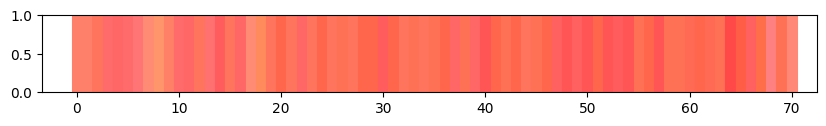

banana class will be output 1 of the classifier
94 samples captured for training with inputs ['Red', 'Green', 'Blue'] 



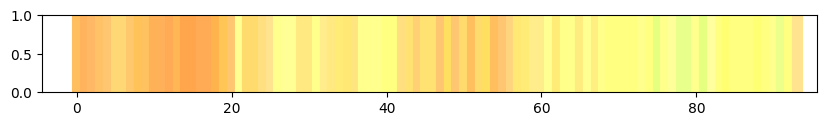

orange class will be output 2 of the classifier
91 samples captured for training with inputs ['Red', 'Green', 'Blue'] 



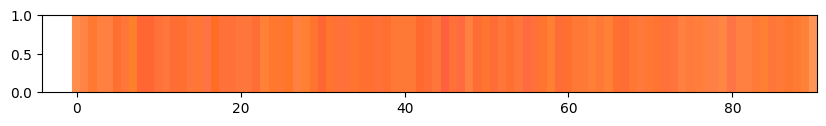

Data set parsing and preparation complete.
Data set randomization and splitting complete.


In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import fileinput
from tensorflow.keras.models import Sequential
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

print(f"TensorFlow version = {tf.__version__}\n")
DATASET_PATH="/home/han/Projects/ArduinoTensorFlowLiteTutorials/FruitToEmoji/data/SampleData/"
OG_MODEL_PATH="/home/han/Projects/ArduinoTensorFlowLiteTutorials/FruitToEmoji/models/og_model"

# Set a fixed random seed value, for reproducibility, this will allow us to get
# the same random numbers each time the notebook is run
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

CLASSES = [];

for file in os.listdir(DATASET_PATH):
    if file.endswith(".csv"):
        CLASSES.append(os.path.splitext(file)[0])

CLASSES.sort()

SAMPLES_WINDOW_LEN = 1
NUM_CLASSES = len(CLASSES)

# create a one-hot encoded matrix that is used in the output
ONE_HOT_ENCODED_CLASSES = np.eye(NUM_CLASSES)

inputs = []
outputs = []

# read each csv file and push an input and output
for class_index in range(NUM_CLASSES):
  objectClass = CLASSES[class_index]
  df = pd.read_csv(DATASET_PATH + objectClass + ".csv")
  columns = list(df)
  # get rid of pesky empty value lines of csv which cause NaN inputs to TensorFlow
  df = df.dropna()
  df = df.reset_index(drop=True)

  # calculate the number of objectClass recordings in the file
  num_recordings = int(df.shape[0] / SAMPLES_WINDOW_LEN)
  print(f"\u001b[32;4m{objectClass}\u001b[0m class will be output \u001b[32m{class_index}\u001b[0m of the classifier")
  print(f"{num_recordings} samples captured for training with inputs {list(df)} \n")

  # graphing
  plt.rcParams["figure.figsize"] = (10,1)
  pixels = np.array([df['Red'],df['Green'],df['Blue']],float)
  pixels = np.transpose(pixels)
  for i in range(num_recordings):
    plt.axvline(x=i, linewidth=8, color=tuple(pixels[i]/np.max(pixels[i], axis=0)))
  plt.show()

  #tensors
  output = ONE_HOT_ENCODED_CLASSES[class_index]
  for i in range(num_recordings):
    tensor = []
    row = []
    for c in columns:
      row.append(df[c][i])
    tensor += row
    inputs.append(tensor)
    outputs.append(output)

# convert the list to numpy array
inputs = np.array(inputs)
outputs = np.array(outputs)

print("Data set parsing and preparation complete.")

# Randomize the order of the inputs, so they can be evenly distributed for training, testing, and validation
# https://stackoverflow.com/a/37710486/2020087
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

# Swap the consecutive indexes (0, 1, 2, etc) with the randomized indexes
inputs = inputs[randomize]
outputs = outputs[randomize]

# Split the recordings (group of samples) into three sets: training, testing and validation
TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print("Data set randomization and splitting complete.")


In [ ]:

PROCESSED_DATASET_PATH="/home/han/Projects/ArduinoTensorFlowLiteTutorials/FruitToEmoji/data/processed_dataset"
# Define the paths to save the datasets
TRAIN_INPUTS_PATH = os.path.join(PROCESSED_DATASET_PATH, "inputs_train.npy")
TRAIN_OUTPUTS_PATH = os.path.join(PROCESSED_DATASET_PATH, "outputs_train.npy")
TEST_INPUTS_PATH = os.path.join(PROCESSED_DATASET_PATH, "inputs_test.npy")
TEST_OUTPUTS_PATH = os.path.join(PROCESSED_DATASET_PATH, "outputs_test.npy")
VALIDATE_INPUTS_PATH = os.path.join(PROCESSED_DATASET_PATH, "inputs_validate.npy")
VALIDATE_OUTPUTS_PATH = os.path.join(PROCESSED_DATASET_PATH, "outputs_validate.npy")

# Save the datasets
np.save(TRAIN_INPUTS_PATH, inputs_train)
np.save(TRAIN_OUTPUTS_PATH, outputs_train)
np.save(TEST_INPUTS_PATH, inputs_test)
np.save(TEST_OUTPUTS_PATH, outputs_test)
np.save(VALIDATE_INPUTS_PATH, inputs_validate)
np.save(VALIDATE_OUTPUTS_PATH, outputs_validate)

print("Datasets have been saved successfully.")

## Build & Train the Model

Build and train a [TensorFlow](https://www.tensorflow.org) model using the high-level [Keras](https://www.tensorflow.org/guide/keras) API.


In [29]:
# build the model and train it
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, activation='relu')) # relu is used for performance
model.add(tf.keras.layers.Dense(5, activation='relu'))
model.add(tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')) # softmax is used, because we only expect one class to occur per input
# model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
# history = model.fit(inputs_train, outputs_train, epochs=400, batch_size=4, validation_data=(inputs_validate, outputs_validate))


In [30]:


OG_MODEL_PATH="/home/han/Projects/ArduinoTensorFlowLiteTutorials/FruitToEmoji/models/og_model/"
# model.save(OG_MODEL_PATH + "model.keras")

model = tf.keras.models.load_model(OG_MODEL_PATH + "model.keras")

### Run with Test Data

Put our test data into the model and plot the predictions


2/2 [==============================] - 0s 3ms/step
Model accuracy is 100.0000% (Number of test samples = 51)


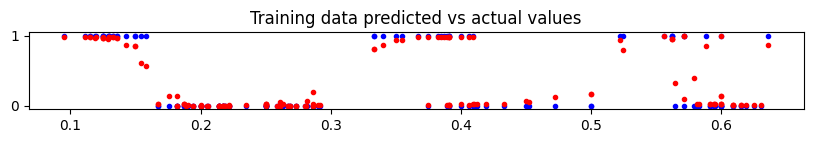

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        11
      banana       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        23

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



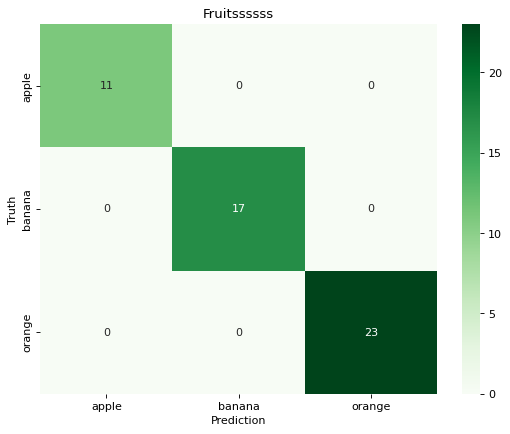

In [31]:
# use the model to predict the test inputs
predictions = model.predict(inputs_test)
pred = np.argmax(np.round(predictions, decimals=3), axis=1)
actu = np.argmax(outputs_test, axis=1)
# print the predictions and the expected ouputs
# print("predictions =\n", np.round(predictions, decimals=3))
# print("predictions =\n", np.round(predictions, decimals=3))
# print("actual =\n", outputs_test)

# print("actual =\n", outputs_test)

accuracy=(np.sum(actu==pred)*100)/len(inputs_test)
print(f'Model accuracy is {accuracy:.4f}% (Number of test samples = {len(inputs_test)})')
#  98.0392%,

# Plot the predictions along with to the test data
plt.clf()
plt.title("Training data predicted vs actual values")
plt.plot(inputs_test, outputs_test, "b.", label="Actual")
plt.plot(inputs_test, predictions, "r.", label="Predicted")
plt.show()

print(classification_report(actu, pred, target_names=CLASSES))

conf_arr = confusion_matrix(actu, pred)

plt.figure(figsize=(8, 6), dpi=80, facecolor="w", edgecolor="k")

ax = sns.heatmap(
    conf_arr,
    cmap="Greens",
    annot=True,
    fmt="d",
    xticklabels=CLASSES,
    yticklabels=CLASSES,
)

plt.title("Fruitssssss")
plt.xlabel("Prediction")
plt.ylabel("Truth")
plt.show(ax)

# Convert the Trained Model to Tensor Flow Lite

The next cell converts the model to TFlite format. The size in bytes of the model is also printed out.


In [32]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("gesture_model.tflite", "wb").write(tflite_model)

import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)


INFO:tensorflow:Assets written to: /tmp/tmp_qq7amn1/assets


INFO:tensorflow:Assets written to: /tmp/tmp_qq7amn1/assets
2024-07-08 12:27:49.450275: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-07-08 12:27:49.450386: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.


Model is 2528 bytes


2024-07-08 12:27:49.450622: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmp_qq7amn1
2024-07-08 12:27:49.451235: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-07-08 12:27:49.451247: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /tmp/tmp_qq7amn1
2024-07-08 12:27:49.452978: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-07-08 12:27:49.474063: I tensorflow/cc/saved_model/loader.cc:217] Running initialization op on SavedModel bundle at path: /tmp/tmp_qq7amn1
2024-07-08 12:27:49.482664: I tensorflow/cc/saved_model/loader.cc:316] SavedModel load for tags { serve }; Status: success: OK. Took 32044 microseconds.
Summary on the non-converted ops:
---------------------------------
 * Accepted dialects: tfl, builtin, func
 * Non-Converted Ops: 6, Total Ops 13, % non-converted = 46.15 %
 * 6 ARITH ops

- arith.constant:    6 occurrences  (f32: 6)



  (f32:

The next cell converts the model to TFlite format using 8-bit quantization.


In [34]:

# 8 bit quantization
def representative_dataset():
  for input_value in tf.data.Dataset.from_tensor_slices(inputs_test).batch(1).take(100):
    yield [input_value]
    
inputs_test = inputs_test.astype(np.float32)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset
# Ensure that if any ops can't be quantized, the converter throws an error
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8,tf.lite.OpsSet.TFLITE_BUILTINS]
# Set the input and output tensors to uint8 (APIs added in r2.3)
converter.inference_input_type = tf.float32
converter.inference_output_type = tf.uint8


tflite_model_int_quant = converter.convert()

# Save the model to disk
open("gesture_model_int_quant.tflite", "wb").write(tflite_model_int_quant)


INFO:tensorflow:Assets written to: /tmp/tmpreaj3ym1/assets


INFO:tensorflow:Assets written to: /tmp/tmpreaj3ym1/assets
/home/han/anaconda3/envs/datasci2/lib/python3.10/site-packages/tensorflow/lite/python/convert.py:953: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
2024-07-08 12:30:30.430980: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-07-08 12:30:30.431021: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-07-08 12:30:30.431164: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpreaj3ym1
2024-07-08 12:30:30.431667: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-07-08 12:30:30.431674: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /tmp/tmpreaj3ym1
2024-07-08 12:30:30.432918: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-07-

3032

In [35]:

import os
# basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model tflite is %d bytes" % os.path.getsize("gesture_model.tflite"))

print("Model tflite int quant is %d bytes" % os.path.getsize("gesture_model_int_quant.tflite"))



Model tflite is 2528 bytes
Model tflite int quant is 3032 bytes


Model analysis


In [36]:
# def print_model_details(model_path):
#     interpreter = tf.lite.Interpreter(model_path=model_path)
#     interpreter.allocate_tensors()
#     input_details = interpreter.get_input_details()
#     output_details = interpreter.get_output_details()
#     tensor_details = interpreter.get_tensor_details()
#     print(f"Model: {model_path}")
#     print(f"\tInputs: {input_details}")
#     print(f"\tOutputs: {output_details}")
#     print(f"\tTensors: {tensor_details}")

# print_model_details("gesture_model.tflite")
# print_model_details("gesture_model_int_quant.tflite")

# def compare_models(model_path1, model_path2):
#     interpreter1 = tf.lite.Interpreter(model_path=model_path1)
#     interpreter2 = tf.lite.Interpreter(model_path=model_path2)
    
#     interpreter1.allocate_tensors()
#     interpreter2.allocate_tensors()
    
#     tensor_details1 = interpreter1.get_tensor_details()
#     tensor_details2 = interpreter2.get_tensor_details()
    
#     print(f"Number of tensors in {model_path1}: {len(tensor_details1)}")
#     print(f"Number of tensors in {model_path2}: {len(tensor_details2)}")
    
#     ops1 = interpreter1.get_tensor_details()
#     ops2 = interpreter2.get_tensor_details()
    
#     print(f"Number of operations in {model_path1}: {len(ops1)}")
#     print(f"Number of operations in {model_path2}: {len(ops2)}")

# compare_models("gesture_model.tflite", "gesture_model_int_quant.tflite")


# import tensorflow as tf

# def analyze_model(model_path):
#     interpreter = tf.lite.Interpreter(model_path=model_path)
#     interpreter.allocate_tensors()
    
#     input_details = interpreter.get_input_details()
#     output_details = interpreter.get_output_details()
#     tensor_details = interpreter.get_tensor_details()

#     print(f"Model: {model_path}")
#     print(f"\tNumber of Inputs: {len(input_details)}")
#     print(f"\tNumber of Outputs: {len(output_details)}")
#     print(f"\tNumber of Tensors: {len(tensor_details)}")

#     for tensor in tensor_details:
#         print(f"\tTensor Name: {tensor['name']}, Shape: {tensor['shape']}, Type: {tensor['dtype']}")

# analyze_model("gesture_model.tflite")
# analyze_model("gesture_model_int_quant.tflite")


# import tensorflow as tf

# def print_tensor_details(model_path):
#     interpreter = tf.lite.Interpreter(model_path=model_path)
#     interpreter.allocate_tensors()
#     tensor_details = interpreter.get_tensor_details()
#     print("#########print_tensor_details#########")
#     print(f"Model: {model_path}")
#     for tensor in tensor_details:
#         print(f"Tensor Name: {tensor['name']}")
#         print(f"  Index: {tensor['index']}")
#         print(f"  Shape: {tensor['shape']}")
#         print(f"  Type: {tensor['dtype']}")
#         print(f"  Quantization: {tensor['quantization']}")
#         print(f"  Quantization Parameters: {tensor['quantization_parameters']}")
#         print(f"  Sparsity Parameters: {tensor['sparsity_parameters']}")

# print_tensor_details("gesture_model.tflite")
# print_tensor_details("gesture_model_int_quant.tflite")


In [37]:

import os
# basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model tflite is %d bytes" % os.path.getsize("gesture_model.tflite"))

print("Model tflite int quant is %d bytes" % os.path.getsize("gesture_model_int_quant.tflite"))



Model tflite is 2528 bytes
Model tflite int quant is 3032 bytes


In [38]:
import time

model_names=["Tflite model","8-bit quatizaed tflite model"]
models=[tflite_model, tflite_model_int_quant]
for j, model in enumerate(models):
  
  interpreter = tf.lite.Interpreter(model_content=model)

  interpreter.allocate_tensors()
  # DTYPE=np.float32
  # DTYPE=np.uint8
  if str(interpreter.get_input_details()[0]['dtype']).split("'")[1] == 'numpy.float32':
    DTYPE=np.float32
  else:
    DTYPE=np.float32

  input_details = interpreter.get_input_details()
  output_details = interpreter.get_output_details()

  input_index = input_details[0]['index']
  output_index = output_details[0]['index']
  y_pred_tflite = []
  
  num_inferences = 0
  total_time = 0.0

  for i in range(len(inputs_test)):
    start_time = time.time()
    input_data = np.expand_dims(inputs_test[i], axis=0).astype(DTYPE)
    interpreter.set_tensor(input_index, input_data)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_index)
    y_pred_tflite.append(np.argmax(output_data))

    end_time = time.time()
    inference_time = end_time - start_time
    total_time += inference_time
    num_inferences+=1
    
  
  average_inference_time = total_time / num_inferences
  print(f"{model_names[j]}: Average inference time over {num_inferences} runs: {average_inference_time:.6f} seconds")
  
  y_true = np.argmax(outputs_test, axis=1)
  conf_matrix = confusion_matrix(y_true, y_pred_tflite)

  # # Plot confusion matrix
  # sns.heatmap(conf_matrix, annot=True, fmt="d")
  # plt.xlabel('Predicted')
  # plt.ylabel('Actual')
  # plt.show()

  # Classification report
  print(f"Classification report for {model_names[j]}")
  print(classification_report(y_true, y_pred_tflite))
  
  """Classification report for 8-bit quatizaed tflite model: 8bit in, 8bit out
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        17
           2       0.45      1.00      0.62        23

    accuracy                           0.45        51
   macro avg       0.15      0.33      0.21        51
weighted avg       0.20      0.45      0.28        51

float in, 8bit out
8-bit quatizaed tflite model: Average inference time over 51 runs: 0.000007 seconds
Classification report for 8-bit quatizaed tflite model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        23

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51
"""


Tflite model: Average inference time over 51 runs: 0.000019 seconds
Classification report for Tflite model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        23

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51

8-bit quatizaed tflite model: Average inference time over 51 runs: 0.000007 seconds
Classification report for 8-bit quatizaed tflite model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        23

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00    

## Encode the Model in an Arduino Header File

The next cell creates a constant byte array that contains the TFlite model. Import it as a tab with the sketch below.


In [39]:
!echo "const unsigned char model[] = {" > ./model.h
!cat gesture_model.tflite | xxd -i      >> ./model.h
!echo "};"                              >> ./model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

Header file, model.h, is 15,624 bytes.

Open the side panel (refresh if needed). Double click model.h to download the file.


# Realtime Classification of Sensor Data on Arduino

Now it's time to switch back to the tutorial instructions and run our new model on the [Arduino Nano 33 BLE Sense](https://www.arduino.cc/en/Guide/NANO33BLE)
